In [1]:
from docx import Document
import os
import re
import csv
import sys

In [2]:
'''
Author: Eden

Read stopwords from files and return a stopwords set.

-filename = file name

return the set of stopwords
'''
def read_stop_words(filename):
    vector = []
    #Read stopwords from file to vector list
    with open(filename, 'r') as f:
        input = f.read().splitlines()
    
    [vector.append(input[i]) for i in range(len(input))]   
    return set(vector)

In [3]:
'''
Author: Zoe

Remove the stopwords such as articles, prep and so on from keywords

-keywords = search word

return the string without stopwords
'''

def remove_stopwords(keywords, stop_set):
    #Split the keywords by space
    word_list = re.split(r'\s',keywords)
    #Remove the stopwords in word_list
    filtered_words = [word for word in word_list if word not in stop_set]
    #Get the new keywords without stopwords
    words = " ".join(filtered_words)
    return words

### 1. indent(para) Example
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Change of control means that (a) any Person or group (within the meaning of Rule13d-5 of the SEC under the Exchange Act) shall become the Beneficial Owner of 20% or more of the Voting Equity Interests of the Borrower, or (b) a majority of the members of the Board of Directors of the Borrower shall cease to be Continuing Members.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Code shall mean the Internal Revenue Code of 1986, as the same may be amended or supplemented from time to time, and any successor statute of similar import, and the rules and regulations thereunder, as from time to time in effect.

In [4]:
'''
Author: Yufei

Get the indent space of the paragraph, used in find_patterns and match function

-para = paragraph

return a num means the indent space or null if no indent
'''
def indent(para):
    if para.paragraph_format.first_line_indent:
        return para.paragraph_format.first_line_indent.pt
    else:
        return None


The non-list paragraph is the parapragh using the Microsoft Word Style



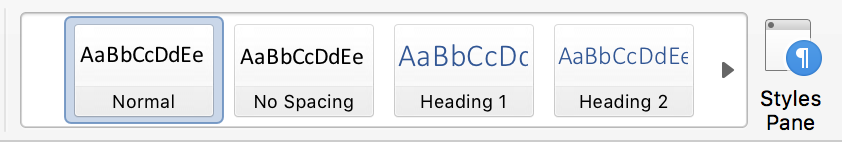

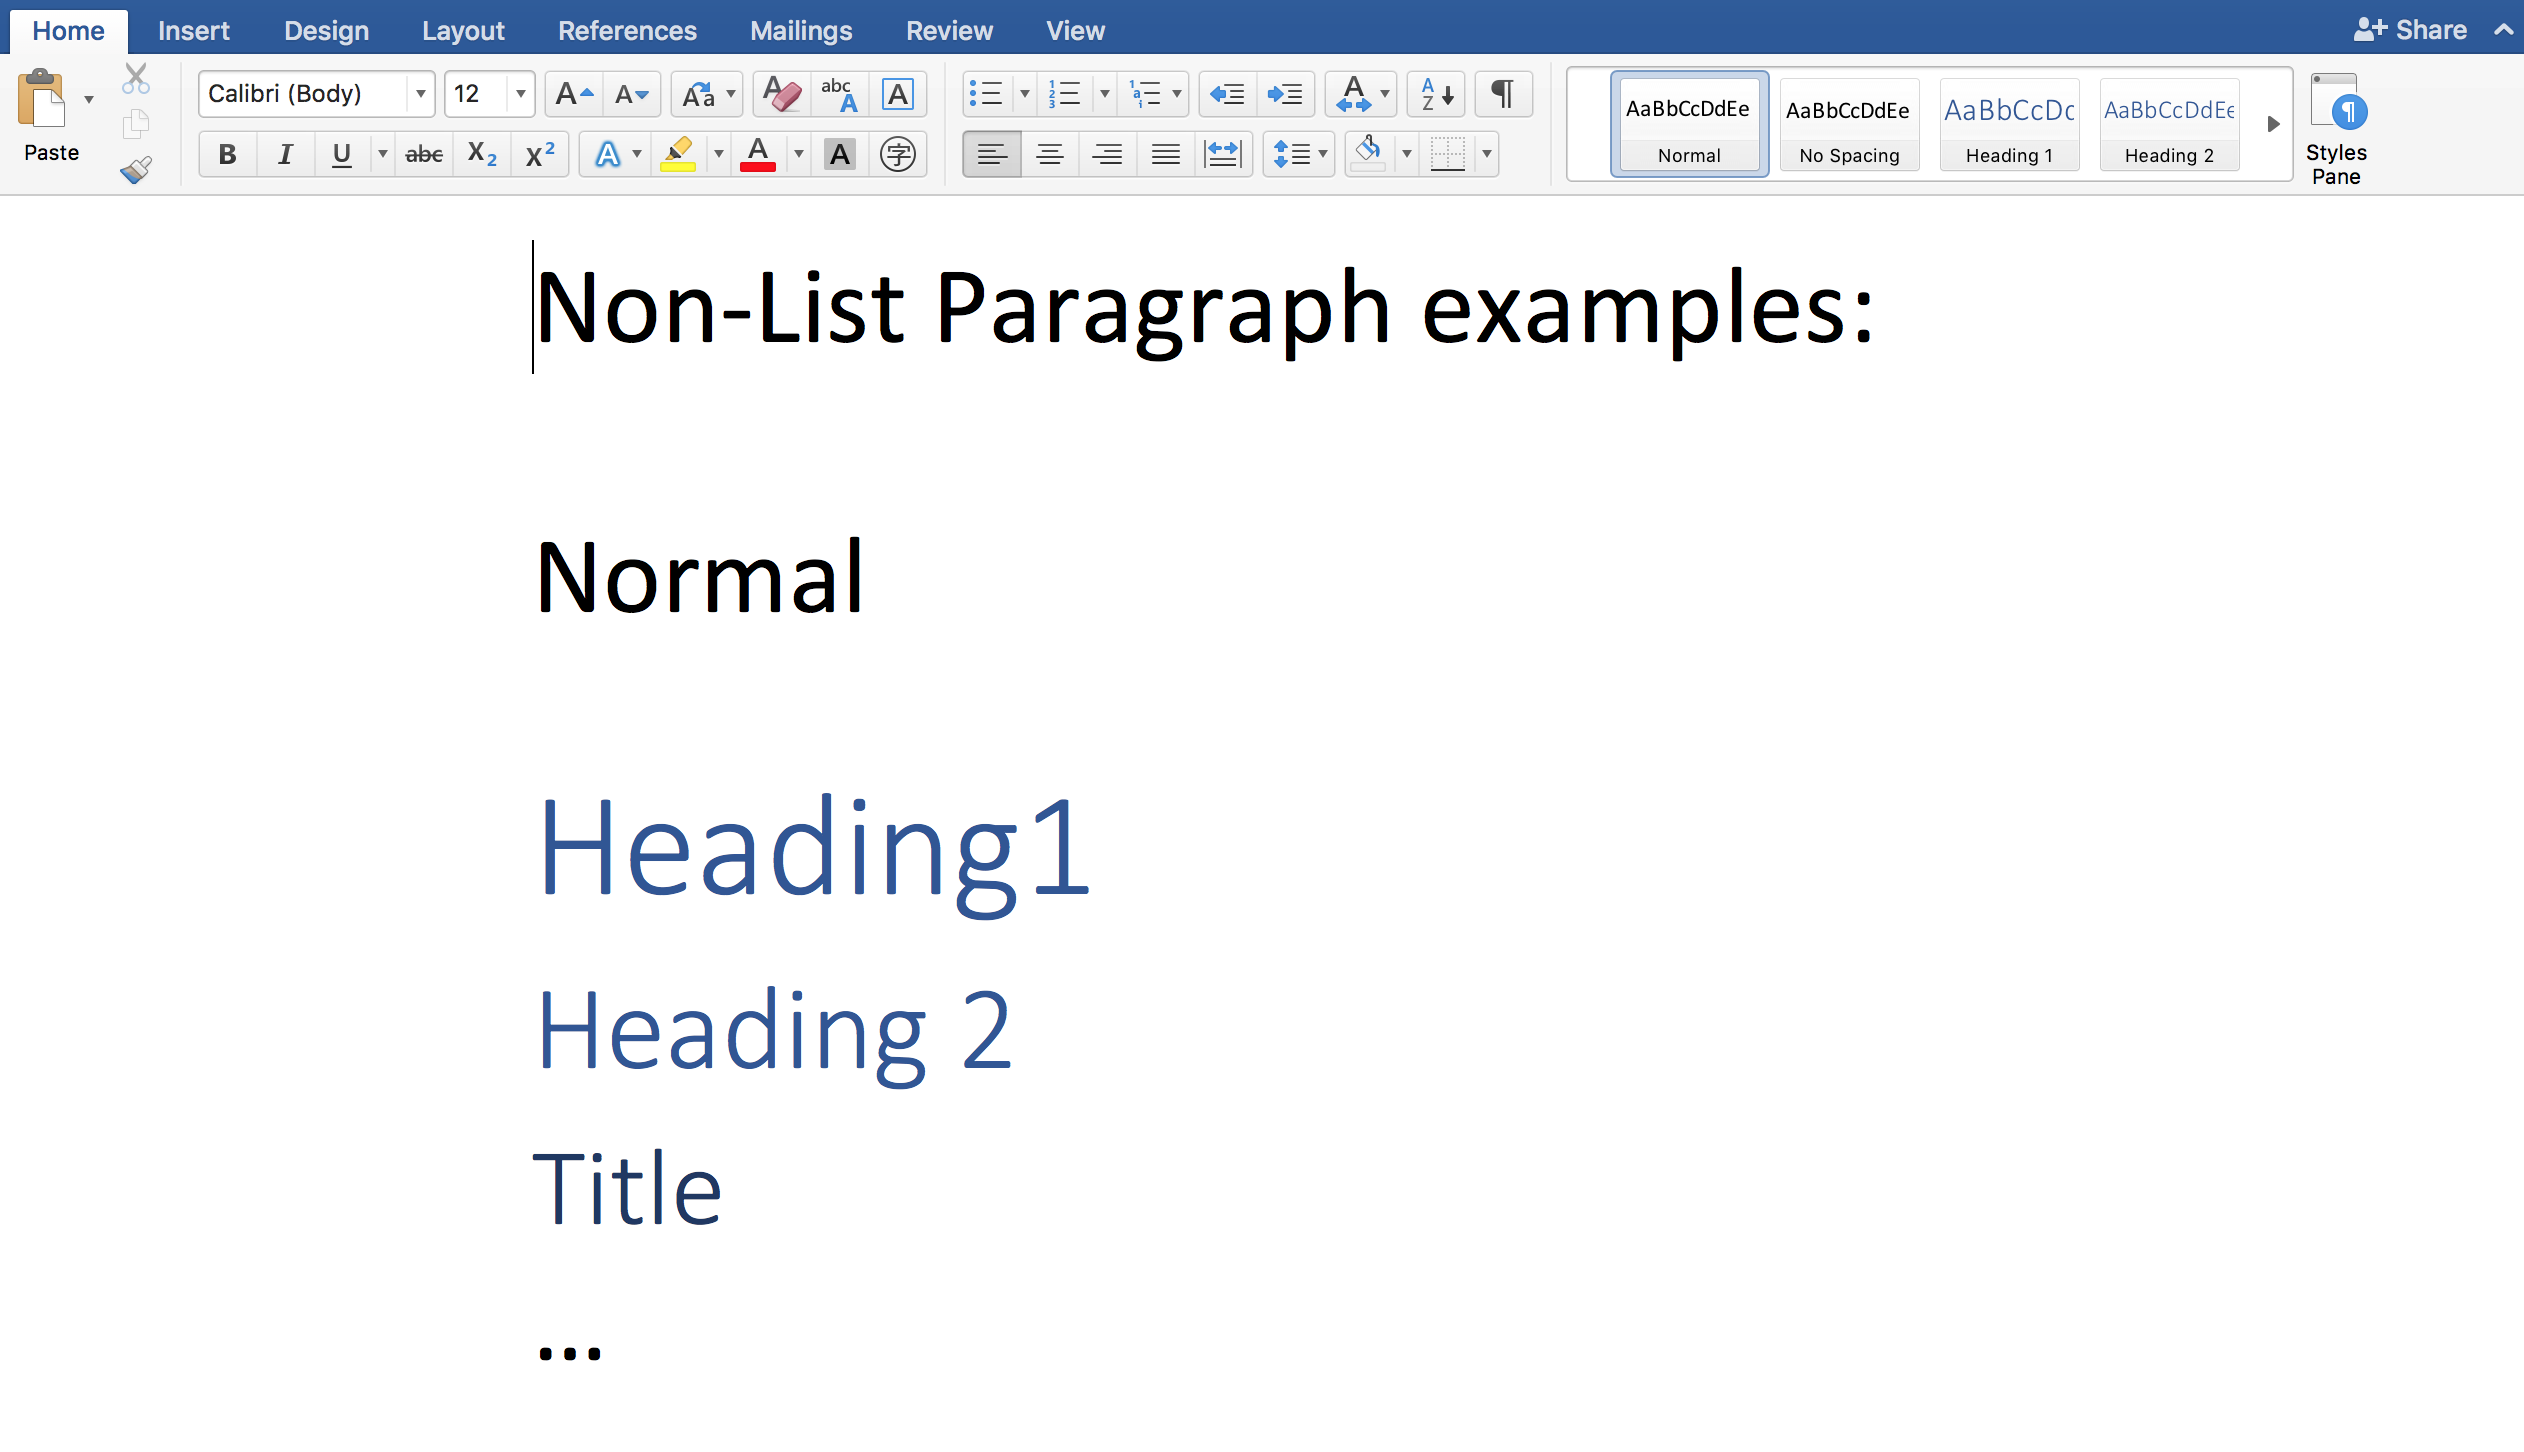

In [5]:
from IPython.display import Image
from IPython.display import display

print('\nThe non-list paragraph is the parapragh using the Microsoft Word Style\n')
display(Image(filename = os.getcwd() + '/res/screenshot/styles.png'))
display(Image(filename = os.getcwd() + '/res/screenshot/nonListPara.png'))


The list paragraph is the paragraph using the Microsoft Word Bullets, Numbering, multilevel list



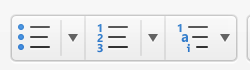

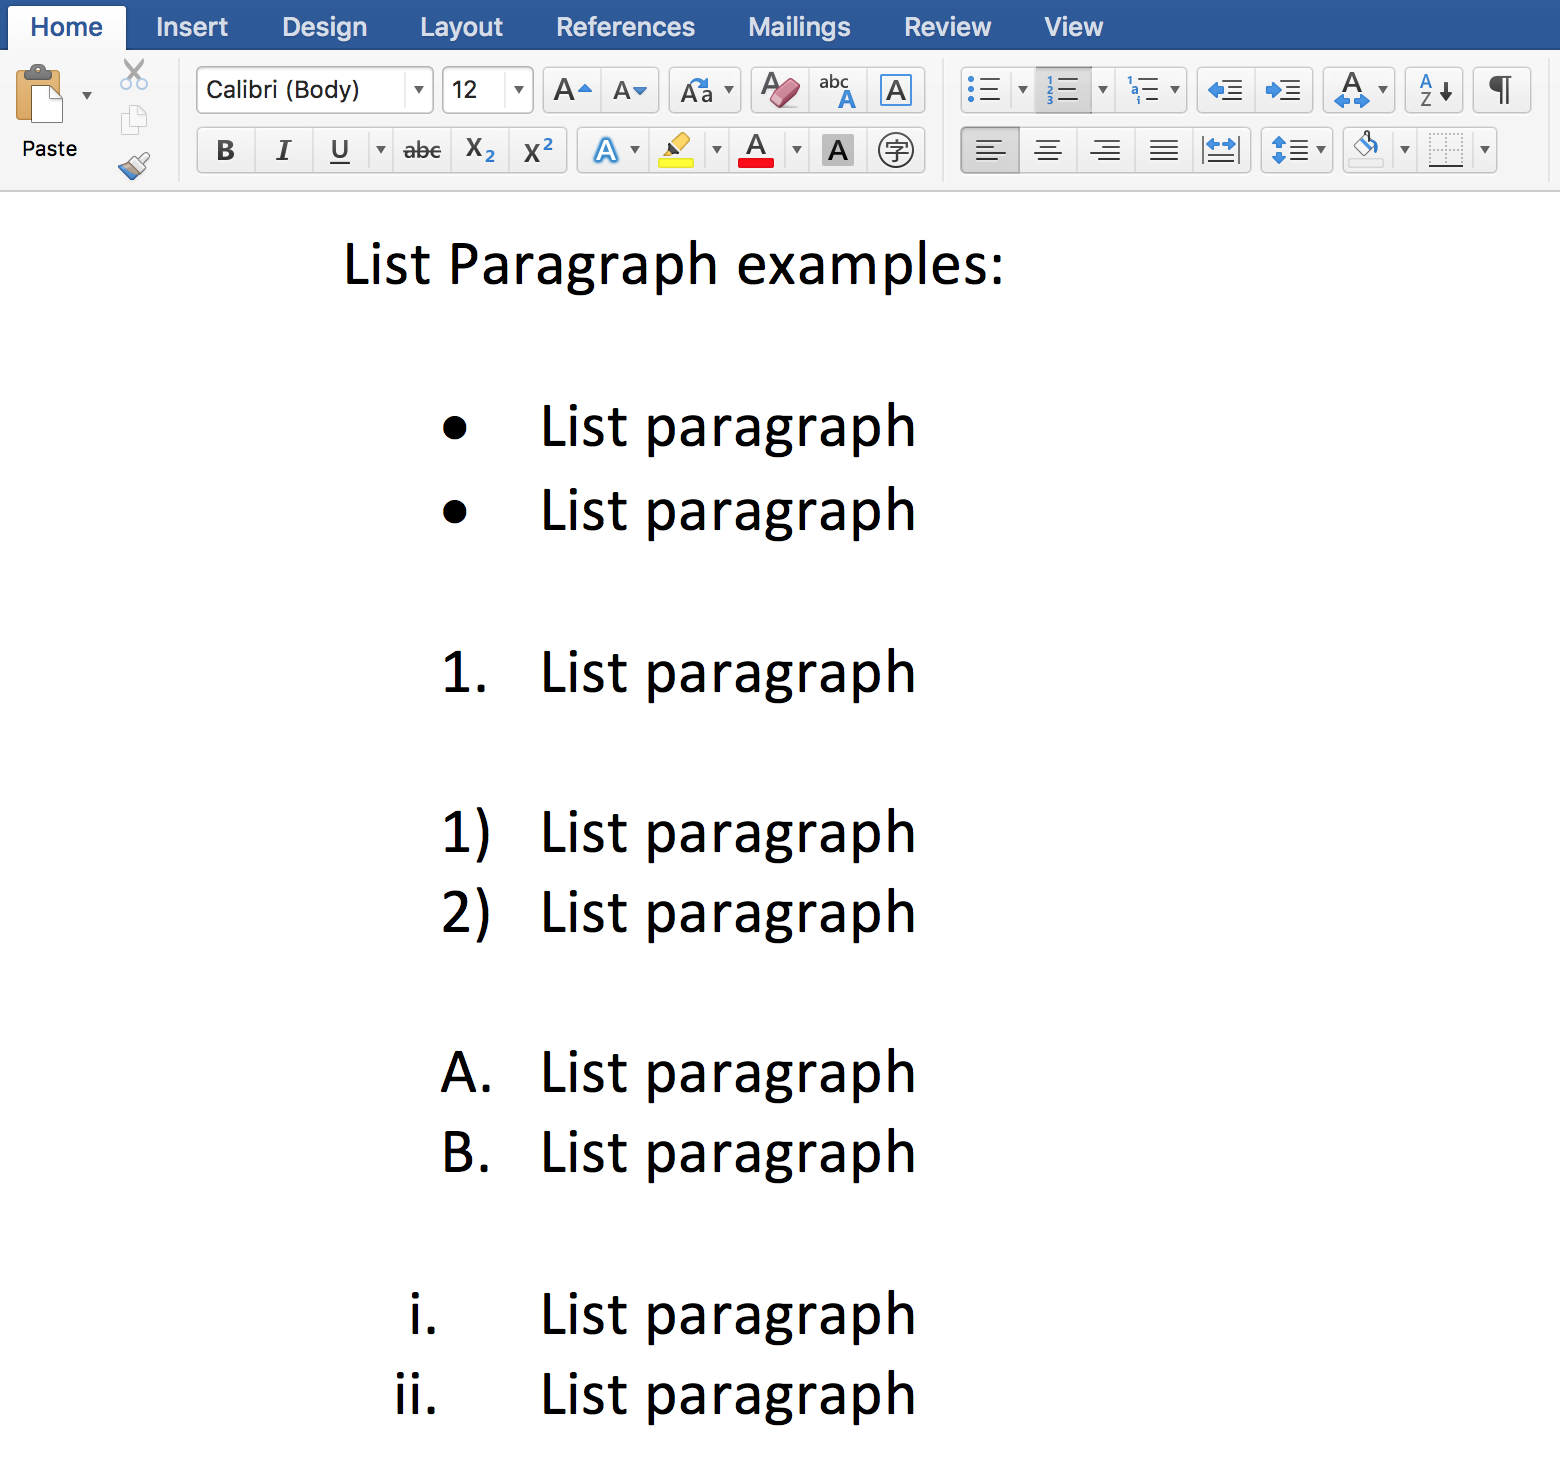

In [6]:
# The list paragraph is the paragraph using the Microsoft Word Bullets, Numbering, multilevel list.
print('\nThe list paragraph is the paragraph using the Microsoft Word Bullets, Numbering, multilevel list\n')
display(Image(filename = os.getcwd() + '/res/screenshot/bulletsNumberingMultilevel.png'))
display(Image(filename = os.getcwd() + '/res/screenshot/listPara.png'))


The manully list paragraph is the paragraph where the bullet,numbering and multilevel is manually type

in instead of using Microsoft Word Bullets, Numbering and multilevel list.



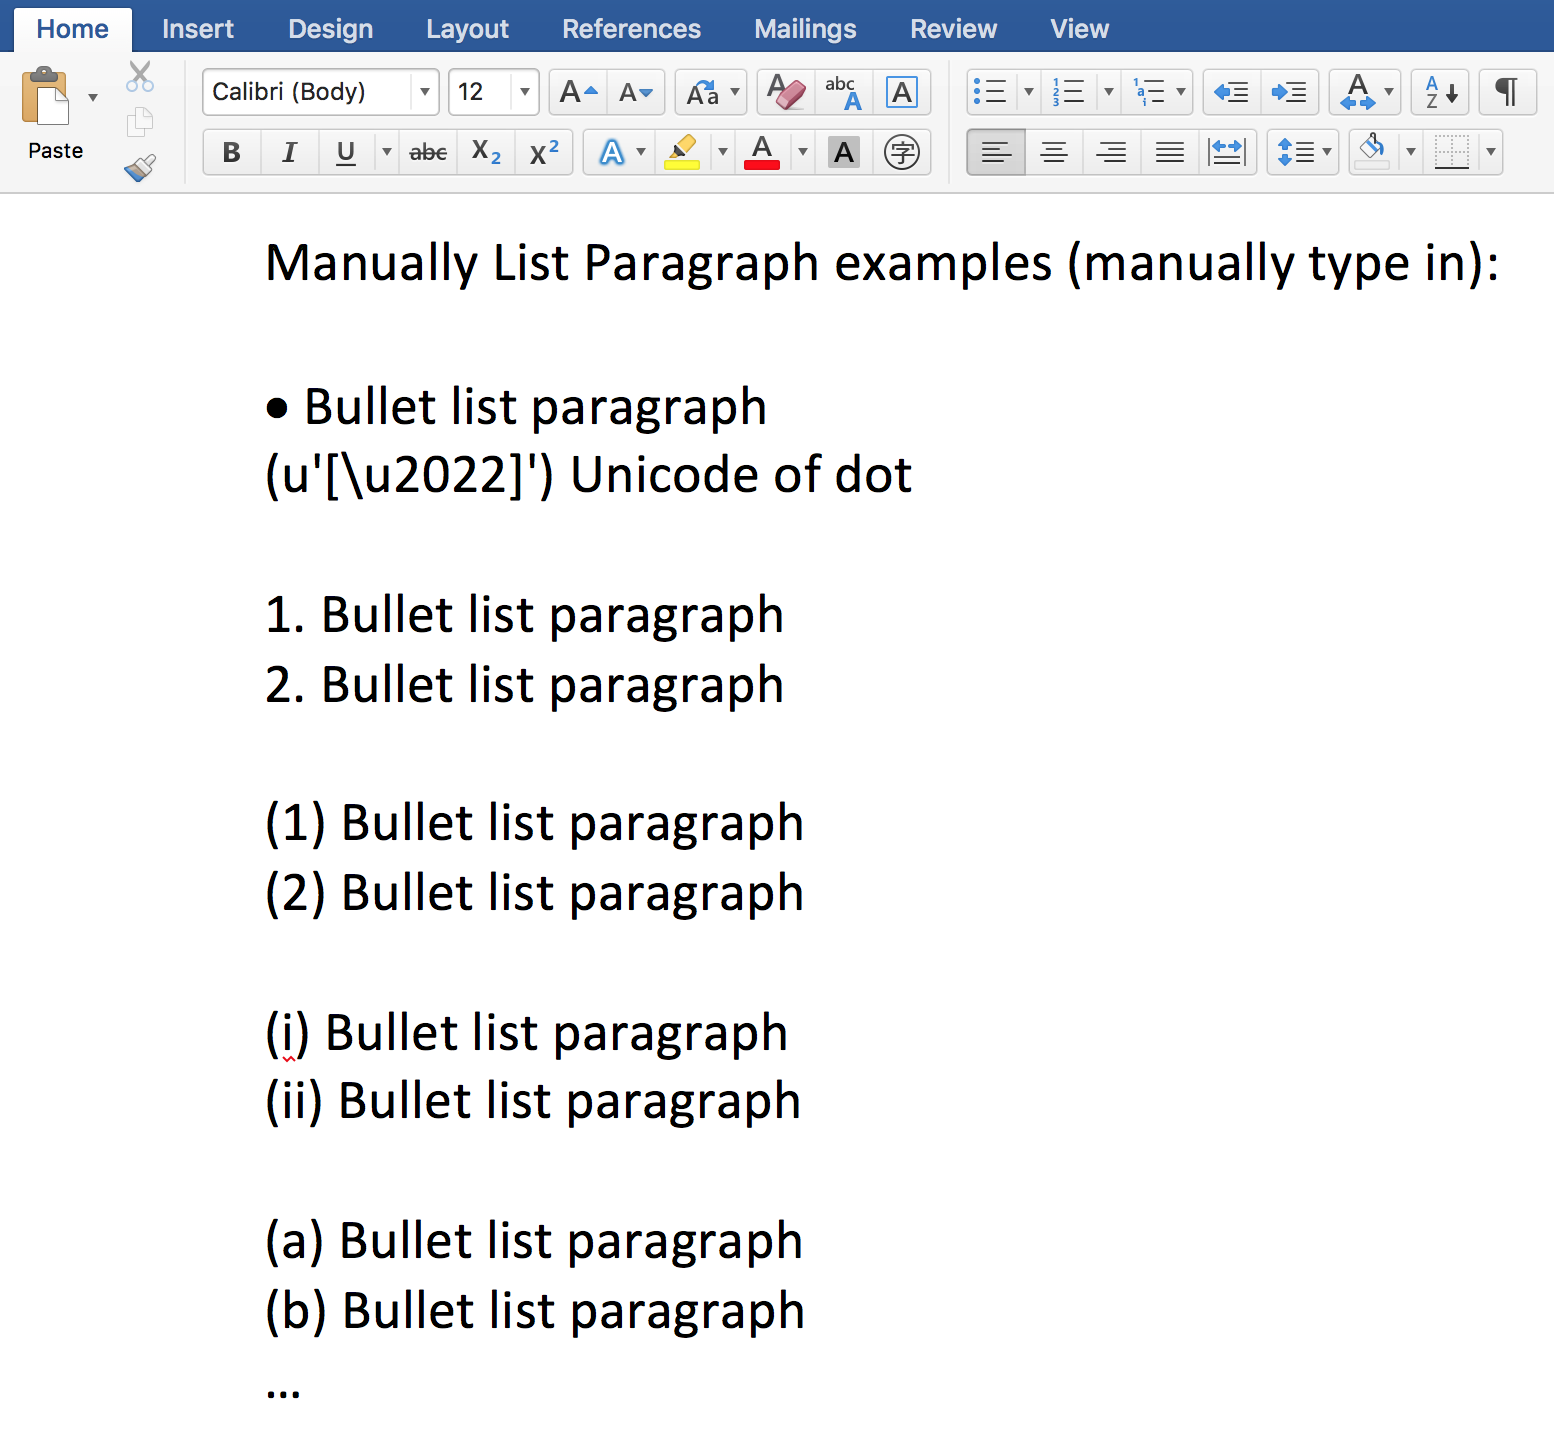

In [7]:
# The manully list paragraph is the paragraph where the bullet,numbering and multilevel is manually type 
# in instead of using Microsoft Word Bullets, Numbering and multilevel list.
print('\nThe manully list paragraph is the paragraph where the bullet,numbering and multilevel is manually type\n')
print('in instead of using Microsoft Word Bullets, Numbering and multilevel list.\n')
display(Image(filename = os.getcwd() + '/res/screenshot/manuallyListPara.png'))

### isManuallyListPara(para) Example
Change of control means that 

&nbsp;&nbsp;&nbsp;&nbsp;(a) any Person or group (within the meaning of Rule13d-5 of the SEC under the Exchange Act) shall become the Beneficial Owner of 20% or more of the Voting Equity Interests of the Borrower, or 

&nbsp;&nbsp;&nbsp;&nbsp;(b) a majority of the members of the Board of Directors of the Borrower shall cease to be Continuing Members.

In [8]:
'''
Author: Eden

Check if the paragraph is bullet ordered list, used in find_patterns and match function

-para = paragraph

return the regex pattern of this paragraph or None
'''
def isManuallyListPara(para):
    pattern = '[·]' # match the bullet point e.g.   · This is the content
    flag = re.match(pattern, para.text.lstrip()[:10])   
    if flag:
        return pattern
    
    pattern = u'[\u2022]' # match the bullet point e.g.   • This is the content
    flag = re.match(pattern, para.text.lstrip()[:10])      
    if flag:
        return pattern
    
    pattern = '[\(]?[A-Z]+\)' # match the upper case numbering point e.g. A) This is the content / (A) This is the content
    flag = re.match(pattern, para.text.lstrip()[:10])      
    if flag:
        return pattern
    
    pattern = '[\(]?[a-z]+\)' # match the lower case numbering point e.g. a) This is the content / (a) This is the content
    flag = re.match(pattern, para.text.lstrip()[:10])
    if flag:
        return pattern
    
    pattern = '[\(]?\d+\)' # match the digital numbering point e.g. 1) This is the content / (1) This is the content
    flag = re.match(pattern, para.text.lstrip()[:10])
    if flag:
        return pattern
    
    pattern = '\d+\.[^\d]+' # match the digital numbering point e.g.  1. This is the content
    flag = re.match(pattern, para.text.lstrip()[:10])
    if flag:
        return pattern
    
    pattern = '[a-z]+\.' # match the lower case numbering point e.g.  a. This is the content
    flag = re.match(pattern, para.text.lstrip()[:10])
    if flag:
        return pattern
    
    pattern = '[A-Z]+\.' # match the upper case numbering point e.g.  A. This is the content
    flag = re.match(pattern, para.text.lstrip()[:10])
    if flag:
        return pattern
    
    
    pattern = '\d+\.\d+[^\d]+' # match the digital numbering point e.g.  1.1. This is the content
    flag = re.match(pattern, para.text.lstrip()[:10])
    if flag:
        return pattern
    
    pattern = '\d+\.\d+\.\d+[^\d]+' # match the upper case numbering point e.g.  1.1.1. This is the content
    flag = re.match(pattern, para.text.lstrip()[:10])
    if flag:
        return pattern
    
    pattern = '\d+\.\d+\.\d+\.\d+[^\d]+' # match the upper case numbering point e.g.  1.1.1.1. This is the content
    flag = re.match(pattern, para.text.lstrip()[:10])
    if flag:
        return pattern
    
    pattern = '[\(]?([vx]|i{1,3}|i[vx]|[vx]i{1,3})(\.|\))' # match the roman numerals point 
    # e.g. i) This is the content    (i) This is the content    i. This is the content
    flag = re.match(pattern, para.text.lstrip()[:10])
    if flag:
        return pattern
    
    return None

### isListPara(para) Example
1. any Person or group (within the meaning of Rule13d-5 of the SEC under the Exchange Act) shall become the Beneficial Owner of 20% or more of the Voting Equity Interests of the Borrower, or 
2. a majority of the members of the Board of Directors of the Borrower shall cease to be Continuing Members.

In [9]:
'''
Author: Alan

Check if the paragraph is list paragraph, used in find_patterns and match function

-para = paragraph

return True/False
'''
def isListPara(para):

    # Get the style name of the paragraph using docx package, the return result is a string, 
    # such as: 'Normal', 'Heading 1', 'List Paragraph' and so on
    
    paraFormat = para.style.name 
    # If the paragraph is list paragraph, then return True. Otherwise, return False
    if paraFormat == 'List Paragraph': 
        return True
    return False

### isFollwingListPara(paras, curIndex) Example
Change of control means that 
1. any Person or group (within the meaning of Rule13d-5 of the SEC under the Exchange Act) shall become the Beneficial Owner of 20% or more of the Voting Equity Interests of the Borrower, or 
2. a majority of the members of the Board of Directors of the Borrower shall cease to be Continuing Members

In [10]:
'''
Author: Alan

Check if a non list paragraph followed by list paragraph, used in find_patterns function.

-paras = all the paragraph
-curIndex = the index of current paragraph

return True/False
'''

def isFollowingListPara(paras, curIndex):
    # Get the style name of the current paragraph using docx package, the return result is a string, 
    # such as: 'Normal', 'Heading 1', 'List Paragraph' and so on
    currentFormat = paras[curIndex].style.name
    # If the current paragraph is the last paragraph of the document, return False
    if curIndex == len(paras) - 1:
        return False
    nextFormat = paras[curIndex+1].style.name # Get the style name of next paragraph
    
    # Check if the style of current paragraph is non list paragraph and the style of next paragraph is list paragraph
    if nextFormat == 'List Paragraph' and currentFormat != 'List Paragraph':
        return True
    return False

In [11]:
'''
Author: Alan

Check if a paragraph followed by a manually generated list paragraph, used in find_patterns function.

-paras = all the paragraph
-curIndex = the index of current paragraph

return True/False
'''

def isFollowingManuallyListPara(paras, index):
    # Get the regular expression of the current paragraph using bullet_list function, 
    # return None if there is no bullet pattern matched
    startPara = paras[index]
    bullet1 = isManuallyListPara(startPara)
    
    # Get the regular expression of next paragraph using bullet_list function
    nextIndex = index + 1
    # If the current paragraph is the last paragraph of the document, return None
    if nextIndex == len(paras):
        bullet2 = None
    else:
        nextPara = paras[nextIndex]
        bullet2 = isManuallyListPara(nextPara)
        
    # print ('Bullet1, ', bullet1)
    # print ('Bullet2, ', bullet2)
    # If either of the current paragraph or next paragraph match the bullet regular expression, return True. 
    # Otherwise return False
    
    return (bullet1 != None or bullet2 != None)

### bold(para) Example
**Change of control** means that (a) any Person or group (within the meaning of Rule13d-5 of the SEC under the Exchange Act) shall become the Beneficial Owner of 20% or more of the Voting Equity Interests of the Borrower, or (b) a majority of the members of the Board of Directors of the Borrower shall cease to be Continuing Members.

**Code** shall mean the Internal Revenue Code of 1986, as the same may be amended or supplemented from time to time, and any successor statute of similar import, and the rules and regulations thereunder, as from time to time in effect.

In [12]:
'''
Author: Zheng

Check if the bold font in the paragraph, used in match function

-para = paragraph

return True/False
'''

def bold(para):
    paras_toPrint = []
    i=0
    for run in para.runs:
        # count the number of run in the start of the paragraph
        if i>3:
            break
        i=i+1
        if run.bold:
            paras_toPrint.append(run.text) 
    # if there is no bold word, return false, otherwise return true
    if len(paras_toPrint) == 0:
        return False
    else:
        return True

### is_bold(para, keywords) Example
**Change of control** means that (a) any Person or group (within the meaning of Rule13d-5 of the SEC under the Exchange Act) shall become the Beneficial Owner of 20% or more of the Voting Equity Interests of the Borrower, or (b) a majority of the members of the Board of Directors of the Borrower shall cease to be Continuing Members.

In [13]:
'''
Author: Zheng

Check if the bold font and keyword in the paragraph, used in find_patterns function

-para = paragraph
-keywords = search words

return True/False
'''

def is_bold(para, keywords):
    paras_toPrint = []
    i=0
    # check whether the paragraph contains the keyword
    if keywords.lower() in para.text.lower(): 
        for run in para.runs:
            # check whether the bold word is in the start of the paragraph.
            if i>1:  
                break
            i=i+1
            if run.bold:
                paras_toPrint.append(run.text)
    if len(paras_toPrint) == 0:
        return False
    else:
        return True

### is_italic(para, keywords) Example
_Change of control_ means that (a) any Person or group (within the meaning of Rule13d-5 of the SEC under the Exchange Act) shall become the Beneficial Owner of 20% or more of the Voting Equity Interests of the Borrower, or (b) a majority of the members of the Board of Directors of the Borrower shall cease to be Continuing Members.

In [14]:
'''
Author: Zheng

Check if the italic font and keywords in the paragraph, used in match function

-para = paragraph

return True/False
'''
def is_italic(para, keywords):
    paras_toPrint = []
    i=0
    if keywords.lower() in para.text.lower(): 
        for run in para.runs:
            if i>1:  
                break
            i=i+1
            # check whether the italic word is in the start of the paragraph.
            if run.italic:
                paras_toPrint.append(run.text)
    if len(paras_toPrint) == 0:
        return False
    else:
        return True

### italic(para) Example
_Code_ shall mean the Internal Revenue Code of 1986, as the same may be amended or supplemented from time to time, and any successor statute of similar import, and the rules and regulations thereunder, as from time to time in effect.

In [15]:
'''
Author: Zheng

Check if the italic font in the paragraph, used in match function

-para = paragraph

return True/False
'''

def italic(para):
    paras_toPrint = []
    i=0
    for run in para.runs:
        # count the number of run in the start of the paragraph
        if i>3:
            break
        i=i+1
        if run.italic:
            paras_toPrint.append(run.text) 
    if  len(paras_toPrint)==0:
        return False
    else:
        return True

### is_underline(para, keywords) Example
Change of control(Underline) means that (a) any Person or group (within the meaning of Rule13d-5 of the SEC under the Exchange Act) shall become the Beneficial Owner of 20% or more of the Voting Equity Interests of the Borrower, or (b) a majority of the members of the Board of Directors of the Borrower shall cease to be Continuing Members.

In [16]:
# Zheng
'''
Author: Zheng

Check if the keyword is underlined in the paragraph, used in find_pattern function

-para = paragraph
-keywords = keywords

return True/False
'''

def is_underline(para, keywords):
    paras_toPrint = []
    i=0
    # check whether the keyword in the paragraph
    if keywords.lower() in para.text.lower(): 
        for run in para.runs:
            # the word with underline should appear in the start of the paragraph
            if i>1:  
                break
            i=i+1
            if run.underline:
                paras_toPrint.append(run.text)
    if len(paras_toPrint) == 0:
        return False
    else:
        return True

### underline(para) Example

Code(Underline) shall mean the Internal Revenue Code of 1986, as the same may be amended or supplemented from time to time, and any successor statute of similar import, and the rules and regulations thereunder, as from time to time in effect.

In [17]:
'''
Author: Zheng

Check if the underline in the paragraph, used in match function

-para = paragraph

return True/False
'''

def underline(para):
    paras_toPrint = []
    i=0
    for run in para.runs:
        # count the number of run in the start of the paragraph
        if i>3:
            break
        i=i+1
        if run.underline:
            paras_toPrint.append(run.text) 
    if len(paras_toPrint) == 0:
        return False
    else:
        return True

### is_double_quotes(para, keywords) Example:
"Change of control" means that (a) any Person or group (within the meaning of Rule13d-5 of the SEC under the Exchange Act) shall become the Beneficial Owner of 20% or more of the Voting Equity Interests of the Borrower, or (b) a majority of the members of the Board of Directors of the Borrower shall cease to be Continuing Members.

In [18]:
'''
Author: Zoe and Yufei

Check if the keyword is double quoted in the paragraph, used in find_patterns function

-para = paragraph

return True/False
'''
def is_double_quotes(para, keywords, stop_set):
    words = re.split(u'[\"\u201c\u201d]',para.text)

    removed_words = remove_stopwords(keyword, stop_set).split(" ")
    if len(words) == 1:  # no double quotes
        return False
    # check if all keywords are in words[1], the first phrase in double quotes, 
    # and words[0] is not regular phrase which means that words[1] is the start of the paragragh
    if all(word.lower() in words[1].lower() for word in removed_words) and \
    len(words[0].replace(u'\xa0', " ").rstrip().lstrip()) < 7 and re.match(r'[a-zA-Z ]*[a-zA-Z]+[a-zA-Z ]*',words[0]) == None:
        return True
    return False

### double_quotes(para) Example:

"Code" shall mean the Internal Revenue Code of 1986, as the same may be amended or supplemented from time to time, and any successor statute of similar import, and the rules and regulations thereunder, as from time to time in effect.


In [19]:
'''
Author: Zoe and Yufei

Check if the double quotes in the paragraph, used in match function

-para = paragraph

return True/False
'''
def double_quotes(para):
    """
        Find if paragraph starts with double quotes
        
        return: True or False
    """
    words = re.split(u'[\"\u201c\u201d]',para.text)
    # print words
    if  len(words) == 1:
        return False
    # if words[0] is not regular phrase, we regard  words[1] as the start of the paragragh
    if len(words[0].rstrip().lstrip()) < 7 and re.match(r'[a-zA-Z ]*[a-zA-Z]+[a-zA-Z ]*',words[0]) == None:
        return True       
    else:
        return False

### is_single_quotes(para, keywords) Example:
'Change of control' means that (a) any Person or group (within the meaning of Rule13d-5 of the SEC under the Exchange Act) shall become the Beneficial Owner of 20% or more of the Voting Equity Interests of the Borrower, or (b) a majority of the members of the Board of Directors of the Borrower shall cease to be Continuing Members.


In [20]:
'''
Author: Zoe and Yufei

Check if the keyword is single quoted in the paragraph, used in find_patterns function

-para = paragraph

return True/False
'''
def is_single_quotes(para, keywords, stop_set):
    words = re.split(u'[\"\u2018\u2019]',para.text)
    removed_words = remove_stopwords(keyword, stop_set).split(" ")
    # re.findall(r'[\"\u201C\u201D].*[\"\u201C\u201D]', para.text)
    # print words
#     print '\tIS Double Quotes', words
    if len(words) == 1:    # no single quotes
        return False
        # check if all keywords are in words[1], the first phrase in single quotes, 
        # and words[0] is not regular phrase which means that words[1] is the start of the paragragh
    if all(word.lower() in words[1].lower() for word in removed_words) and \
    len(words[0].replace(u'\xa0', " ").rstrip().lstrip()) < 7 and re.match(r'[a-zA-Z ]*[a-zA-Z]+[a-zA-Z ]*',words[0]) == None:
        return True
    return False

### single_quotes(para) Example:

'Code' shall mean the Internal Revenue Code of 1986, as the same may be amended or supplemented from time to time, and any successor statute of similar import, and the rules and regulations thereunder, as from time to time in effect.


In [21]:
'''
Author: Zoe and Yufei

Check if single quotes in the paragraph, used in match function

-para = paragraph

return True/False
'''
def single_quotes(para):
    words = re.split(u'[\"\u2018\u2019]',para.text)
    if len(words) == 1:
        return False
    # if words[0] is not regular phrase, we regard words[1] as the start of the paragragh
    if len(words[0].rstrip().lstrip()) < 7 and re.match(r'[a-zA-Z ]*[a-zA-Z]+[a-zA-Z ]*',words[0]) == None:
        return True       
    else:
        return False

### is_upper_case(para, keywords) Example:
CHANGE OF CONTROL shall mean the Internal Revenue Code of 1986, as the same may be amended or supplemented from time to time, and any successor statute of similar import, and the rules and regulations thereunder, as from time to time in effect.


In [22]:
'''
Author: Zoe and Zheng

Check if the keyword is upper case in the start of paragraph, used in find_patterns function

-para = paragraph

return True/False
'''
def is_upper_case(para, keywords):
    # Find all uppercase words 
    words = re.findall(r'([()\'\"A-Z0-9_.]+)\s*', para.text)
    
    # Check if there are any upper case words in the paragraph
    if not words:
        return False
    # Split paragraph by space as a list 
    para_list = para.text.split(" ")
    start_str = ""
    # Match the last consecutive upper case word from start of the paragraph
    for i in range(len(para_list)):
        if para_list[i] == words[i]:
            last_word = words[i]
            start_str += last_word + " " # Append the consecutive upper case words
        else:
            break
    # check if the keyword is in the start of the paragraph
    if keywords.lower() in start_str.lower():
        return True
    else:
        return False

### upper_case(para) Example:

UPPERCASE shall mean the Internal Revenue Code of 1986, as the same may be amended or supplemented from time to time, and any successor statute of similar import, and the rules and regulations thereunder, as from time to time in effect.


In [23]:
'''
Author: Zoe and Zheng

Check if upper case word in the paragraph, used in match function

-para = paragraph

return True/False
'''
def upper_case(para):
    # find all uppercase words 
    words = re.findall(r'([A-Z]+?)\s',para.text)
    if not words:
        return False
    if para.text.startswith(words[0]):
        return True
    else:
        return False

#### Remove_Stopwords Test

In [24]:
'''
Testing Function
'''
directory_path = 'res' 
fileName = 'stop_words.txt'
stop_set = read_stop_words(directory_path + '/' +  fileName)
keyword = "Change of Control"
print remove_stopwords(keyword, stop_set)

Change Control


In [25]:
'''
Author: Eden

Traversing through each of the paragraphs and find the paragraph containing the keywords

-paras = all paragraphs
-keywords = search words

return a list of paragraph index 
'''
def search_2(paras, keywords, stop_set):
    index = []
    idx_to_term = {}
    i = 0
    
    target = remove_stopwords(keywords.lower(), stop_set) # remove stop words and get words list
    target_words = re.split('[\s]', target)
    
    # iterate all the paragraph and return the index of the paragraph which contains key words
    while (i<len(paras)):
        p = paras[i]
        flag, term = contains_sliding_window(p.text, target_words, 2 * len(keywords)) # use sliding window to get keywords
        if flag: 
            index.append(i)
            idx_to_term[i] = term
        i = i+1
    return index, idx_to_term

In [26]:
'''
Author: Eden

Find the keywords by sliding windows so that even the order of keywords change, we can still fetch the results

-text = all paragraphs
-keywords = search words
-win_len = the length of sliding window

return True if the keyword is in text within a sliding window by random orders.
'''
def contains_sliding_window(text, target_words, win_len):
    text_low = text.lower()
    probe = target_words[0] # Probe is the first word of target words list
    term = None
    flag = False # Flag is used to check whether we find all key words in the given text
    idx = 0
    while (True):
        text = text[idx:] # Search the remaining text after last search
        text_low = text_low[idx:]
        if probe in text_low:
            idx = text_low.index(probe) # Get the index of probe first appearance in text
            l_pointer = max(0,idx - win_len) # Determine the left border of sliding window
            r_pointer = min(len(text_low),idx + win_len) # Determine the right border of sliding window
            window_str = text[l_pointer:r_pointer] # Substr the content of sliding window 
            window_str_low = window_str.lower()
            flag = True
            
            l_border = len(window_str_low)
            r_border = 0
            for target_word in target_words:  # Check whether every word exist in sliding window, 
                if target_word not in window_str_low:  # If any word miss in sliding windows string, flag will be false
                    flag = False
                else:
                    border_idx = window_str_low.index(target_word)
                    l_border = min(l_border, border_idx)
                    r_border = max(r_border, border_idx + len(target_word))
            if flag:
                return True, window_str[l_border:r_border]
            else:
                idx = idx + 1  # Increase index to skip first character and avoid infinite loop
        else:
            return False, None # If there is not probe in the text any more, return false
    return False, None


### upper_camel_case(para, keywords) Example:
Capitalized Lease Obligations means, with respect to any Person, all outstanding obligations of such Person in respect of Capital Leases, taken at the capitalized amount thereof accounted for as indebtedness in accordance with GAAP.

Change of Control means that (a) any Person or group (within the meaning of Rule13d-5 of the SEC under the Exchange Act) shall become the Beneficial Owner of 20% or more of the Voting Equity Interests of the Borrower, or (b) a majority of the members of the Board of Directors of the Borrower shall cease to be Continuing Members.

Code shall mean the Internal Revenue Code of 1986, as the same may be amended or supplemented from time to time, and any successor statute of similar import, and the rules and regulations thereunder, as from time to time in effect.

In [75]:
'''
Author: Zoe and Zheng

Check if the words following upper camel rule in the paragraph, used in match function

-para = paragraph
-stop_set = stop words

return True/False
'''
# find pattern like Change of Control
def upper_camel_case(para, stop_set):

    # remove list pattern
    pattern = isManuallyListPara(para)
    match = re.search(str(pattern), para.text)
    if match:
        result = match.group()
    else:
        result = ""
    print result
    #words = str(p.text)
    word = para.text.lstrip(result)
    
    
    words_list = re.split(" ", word)  # Split the paragraph into words
    new_para = remove_stopwords(word,stop_set) # Remove the stopword
    new_para_list = re.split(" ", new_para)
    
    new_words_list = re.split('\s', new_para)
    new_words_list = [word for word in new_words_list if re.match(r'[A-Z][a-z0-9\']+', word)]
#     print(new_para)
#     print("222")
#     print(new_words_list)
    #new_words_list = re.findall(r'([A-Z][a-z0-9\']+)[^A-Z]?\s', new_para) # Find all the words with the first letter uppercase
    if len(new_words_list) == 0:
        return False
    last_word = ""
    # Get the last word which has captical letter
    for i in range(len(new_words_list)):
        if new_words_list[i] == new_para_list[i]:
            last_word = new_words_list[i]
        else:
            break
    result = []
    # grab all the words before the last word that is with the first letter uppercase
    for j in range(len(words_list)):
        if last_word == words_list[j]:
            result.append(last_word)
            break
        else:
            result.append(words_list[j])
    # check whether the keyword is contained in the camel pattern phrase
    if len(result) > 1:
        return True
    else:
        return False

### is_upper_camel_case() Example:
Change of Control means that (a) any Person or group (within the meaning of Rule13d-5 of the SEC under the Exchange Act) shall become the Beneficial Owner of 20% or more of the Voting Equity Interests of the Borrower, or (b) a majority of the members of the Board of Directors of the Borrower shall cease to be Continuing Members.


In [73]:
'''
Author: Zoe and Zheng

Check if the keywords is following upper camel rule in the paragraph or not, used in find_pattern function

-para = paragraph
-keyword = keyword
-stop_set = stop words

return True/False
'''
def is_upper_camel_case(paragraph, keyword, stop_set):
    # remove list pattern 
    pattern = isManuallyListPara(paragraph)
    match = re.search(str(pattern), paragraph.text)
    if match:
        result = match.group()
    else:
        result = ""
    print result
    # words = str(p.text)
    word = paragraph.text.lstrip(result)
    
    words_list = re.compile('\w+').findall(word) # Split the paragraph into words  
    new_paragraph = remove_stopwords(word, stop_set) # Remove the stopword
    new_paragraph_list = re.compile('\w+').findall(new_paragraph)
    
    new_words_list = re.split('\s', new_paragraph)
    new_words_list = [word for word in new_words_list if re.match(r'[A-Z][a-z0-9\']+', word)]
    #new_words_list = re.findall(r'([A-Z][a-z0-9\']+)[^A-Z]?\s', new_paragraph) # Find all the words with the first letter uppercase
    if len(new_words_list) == 0:
        return False
#     print(new_paragraph)
#     print("222")
#     print(new_words_list)
#     print(words_list)
    last_word = ""
    # Get the last word which has captical letter 
    for i in range(len(new_words_list)):
        if new_words_list[i] == new_paragraph_list[i]:
            last_word = new_words_list[i]
        else:
            break
    result = []
    # Grab all the words before the last word that is with the first letter uppercase.
    for j in range(len(words_list)):
        if last_word == words_list[j]:
            result.append(last_word)
            break
        else:
            result.append(words_list[j])
    results = " ".join(result)
#     print("111")
#     print(results)
    # Check whether the keyword is contained in the camel pattern phrase.
    if keyword.lower() in results.lower():
        return True
    else:
        return False

In [29]:
'''
Author: Yufei

Iterate all the paragraphs and find the paragraph containing the keywords

-paras = all paragraphs
-keywords = search words

return a list of paragraph index 
'''
def search(paras, keywords):
    index = []
    i = 0
    while (i<len(paras)):
        p = paras[i]
        # If the paragraph contains the keyword, add the index to the result
        if keywords.lower() in p.text.lower():
            index.append(i)
        i = i+1
    
    return index

In [30]:
'''
Author: Yufei

Find the pattern of the paragraph containing the keywords by call the is_* function

-paras = all paragraphs
-index = paragraph index
-keyword = search words
-stop_set = stop words set, used to remove stop words

return patterns list, 
[bold, italic, underline, double_quotes, single_quotes, upper case, upper camel case, indent space, list paragraph, 
    is following list paragraph, is following  manually list paragraph, is manually list paragraph]

'''
def find_patterns(paras, index, keyword, stop_set):
    paragraph = paras[index]
    patterns = []
    patterns.append(is_bold(paragraph, keyword))
    patterns.append(is_italic(paragraph, keyword))
    patterns.append(is_underline(paragraph, keyword))
    patterns.append(is_double_quotes(paragraph, keyword, stop_set))
    patterns.append(is_single_quotes(paragraph, keyword, stop_set))
    patterns.append(is_upper_case(paragraph, keyword))
    patterns.append(is_upper_camel_case(paragraph, keyword, stop_set))
    patterns.append(indent(paragraph))
    patterns.append(isListPara(paragraph))
    patterns.append(isFollowingListPara(paras, index))
    patterns.append(isFollowingManuallyListPara(paras, index))
    patterns.append(isManuallyListPara(paragraph))
    return patterns

In [63]:
'''
Author: Yufei

Find the pattern of each paragraph and match it with target pattern

-paras = all paragraphs
-targetPatterns = the target pattern
-startIndex = start index for matching

return matched content and index of last paragraph in matched parts
'''
def match(paras, targetPatterns, startIndex):
    
    i = startIndex + 1
    match = []   # Matched contents
    
    # Print patterns for debug
    print '\tTarget Patterns: ' + str(parttern_translate(targetPatterns))
    
    n = 0 # Number of nonempty paragraphs
    while (i<len(paras)):
        
        patterns = []
        p = paras[i]
#         tmp = p.text.replace(u'\xa0', '')
#         tmp1 = re.sub('\s|\xa0','',p.text) 
#         print("123:" + p.text)
#         #print("3333333")
#         print("234:" + tmp)
#         print("345:" + tmp1)
        # Ignore empty paragraphs
        if re.sub('\s|\xa0','',p.text)  == "":
            
            i = i + 1
            continue
        
        patterns.append(bold(p))
        patterns.append(italic(p))
        patterns.append(underline(p))
        patterns.append(double_quotes(p))
        patterns.append(single_quotes(p))
        patterns.append(upper_case(p))
        patterns.append(upper_camel_case(p, stop_set))
        patterns.append(indent(p))
        patterns.append(isListPara(p))
        patterns.append(isFollowingListPara(paras, i))
        patterns.append(isFollowingManuallyListPara(paras, i))
        patterns.append(isManuallyListPara(p))
        
        # Print patterns for debug
        print '\n\tNext Paragraph:\t{0}\n\n\t\t{1}'.format(str(parttern_translate(patterns)), p.text.encode("utf-8"))
        n = n + 1
        
        # Find same pattern, stop iteration
        if patterns == targetPatterns:
            print 'Bingo Bingo Bingo Bingo'
            break
        i = i + 1
        # Not find same pattern, then just return the first paragraph
        if n > 10 or i == len(paras):
            match.append(paras[startIndex])
            i = startIndex
            break
    # Append all matched paragraphs
    for x in range(startIndex, i):
        match.append(paras[x])
        
    return match, i-1

In [32]:
'''
Author: Eden

return the list of patterns' name

-pattern = the pattern list with true/false

return list of patterns name
'''
def parttern_translate(pattern):
    # This function is for testing, return the list of patterns' name so that it is easier check the patterns match
    list = []
    if pattern[0]:
        list.append('bold')
    if pattern[1]:
        list.append('italic')
    if pattern[2]:
        list.append('underline')
    if pattern[3]:
        list.append('double_quotes')
    if pattern[4]:
        list.append('single_quotes')
    if pattern[5]:
        list.append('upper_case')
    if pattern[6]:
        list.append('upper_camel_case')
    if pattern[7]:
        list.append(pattern[7])
    if pattern[8]:
        list.append('list_paragraph')
    if pattern[9]:
        list.append('is_following_list_paragraph')
    if pattern[10]:
        list.append('is_following_manually_list_paragraph')
    if pattern[11]:
        list.append('isManuallyListPara')
    return list

In [76]:
'''
Main Function.
'''

########################################################################
out_filepath = 'output/'
out_filename = 'Output_search.csv'
out_path = out_filepath + out_filename
header = ['File Name', 'Keywords', 'Content'] # Column names in output file 
########################################################################


# Write header
with open(out_path, 'wb') as f:
    wr = csv.writer(f)
    wr.writerow(header)
    
with open(out_path, 'ab') as f:
    # Input folder path
    directory_path = '1/' 
    
    stop_set = read_stop_words('res/stop_words.txt')    
    
    # Parse through each file in the input folder path
    # print 'Keyword: ' + 'Change of Control' + '\n'
    for fileName in os.listdir(directory_path):
        # Ignore other files
        if fileName == '.DS_Store':
            continue
        if fileName.startswith('~$'):
            continue
        print '-------------------------------------------------------------------------'
        print 'File name: ' + fileName + '\n'
        
        # Create a Document object of each of the files
        document = Document(directory_path + "/" +fileName)
        if not len(document.tables) == 0:
            print("Exception!! tables in the document")
#         for table in document.tables:
#             for row in table.rows:
#                 for cell in row.cells:
#                     print(cell.text)
        # document = Document('/upper_camel_case+underline+after_list_paragraph.docx')
        
        if not len(document.inline_shapes) == 0:
            print("Exception!! pictures in the document")
        
        # A list to add all the paragraphs in the document
        paras = []
        
        '''
        The following for loop is used to add all the paragraphs in the document to the paras list object
        '''
        for p in document.paragraphs:  
            #print(p.text)
            paras.append(p)
            
        paras_number = len(paras) # Find the number of paragraphs in the document
        
        paras_toPrint = [] # A list to add all the paragraphs relevant to 'Change of Control' language in this case
        
        keyword = "collateral documents"
        # keywordindex = search(paras, keyword)
        keywordindex, idx_to_term = search_2(paras, keyword, stop_set)
        print '\tkeywordIndex: ' + str(keywordindex)
        print idx_to_term
        
        results = []
        result = ""
        endindex = -1 # The index of the end of the last matched content
        for index in keywordindex:
            keyword = idx_to_term[index]
            # If the paragraph has been matched before, ignore it
            if index <= endindex:
                continue
            
            # If the keyword is not at the start of a paragraph, just extract this paragraph and don't match other paragraphs
            if not keyword.lower() in paras[index].text[:60].lower():
                results.append(paras[index])
                endindex = index
                print '\tTarget Paragraph: [{0}]\n\t\t{1}\n'.format(index, paras[index].text.encode("utf-8"))
                continue
                
            print '\tTarget Paragraph: [{0}]\n\t\t{1}\n'.format(index, paras[index].text.encode("utf-8"))
            target = find_patterns(paras, index, keyword, stop_set) # Find the target pattern
            
            if index == paras_number - 1: # The last paragraph
                result = paras[index]
            else:
                result, endindex = match(paras, target, index)
            
            results.append(result)

        # Output the result to a csv file
        wr = csv.writer(f,escapechar='\\')
        # Created a single list of all instances of 'Change of Control'
        # Ignored unrecognized ascii characters that throw an encoding error. Need improvement
        for result in results:
            if hasattr(result, '__iter__'):
                text =  [paras.text.encode("utf-8") for paras in result]
                res = "\n".join(text)
            else:
                res = result.text.encode("utf-8")
            
            wr.writerow([fileName, keyword, res])
        
        print '\n'
print("end")
f.close()

-------------------------------------------------------------------------
File name: 10_collateral_documents_4_break_line+footer.docx

Exception!! tables in the document
	keywordIndex: [10, 16, 23, 37, 42, 45, 53, 54, 60, 61, 63, 95, 102, 154, 159, 175, 197, 205, 223, 224]
{224: u'Collateral Documents', 175: u'Collateral Documents', 37: u'COLLATERAL DOCUMENTS', 102: u'Collateral Documents', 10: u'COLLATERAL DOCUMENTS', 197: u'Collateral Documents', 159: u'COLLATERAL DOCUMENTS', 45: u'Collateral Documents', 223: u'Collateral Documents', 61: u'Collateral Documents', 16: u'Collateral Documents', 205: u'Collateral Documents', 53: u'Collateral Documents', 54: u'Collateral Documents', 23: u'Collateral Documents', 154: u'Collateral Documents', 95: u'Collateral Documents', 60: u'Collateral Documents', 42: u'Collateral Documents', 63: u'Collateral Documents'}
	Target Paragraph: [10]
		COLLATERAL DOCUMENTS


	Target Patterns: ['upper_case']

Dated October 24, 2012
222
[u'Dated', u'October']

	Ne

This Amendment shall become effective on, Purchaser’s obligation purchase pay Series 2012 Notes sold 2012 Closing shall effective until, Business Day following conditions shall satisfied (the “Effective Date”):
222
[u'This', u'Amendment', u'Purchaser\u2019s', u'Series', u'Notes', u'Closing', u'Business', u'Day', u'Date\u201d):']

	Next Paragraph:	['bold', 'upper_camel_case', 'is_following_manually_list_paragraph']

		This Amendment shall become effective on, and the Purchaser’s obligation to purchase and pay for the Series 2012 Notes to be sold to it at the 2012 Closing shall not be effective until, the Business Day when each of the following conditions shall have been satisfied (the “Effective Date”):
(a)
 The Purchaser shall received Amendment, duly executed Obligor.
222
[u'The', u'Purchaser', u'Amendment,', u'Obligor.']

	Next Paragraph:	['is_following_manually_list_paragraph', 'isManuallyListPara']

		(a) The Purchaser shall have received this Amendment, duly executed by each Oblig